## Naive Linear regression model

In [1]:
import os, sys
import numpy as np
import pandas as pd

from config_local import local_config

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv(local_config.TRAIN_PROCESS6_CSV)
test  = pd.read_csv(local_config.TEST_PROCESS6_CSV)
testRaw = pd.read_csv(local_config.TEST_CSV, index_col="Id")

In [4]:
y = train['logSP']
X = train.drop(['logSP'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_real = np.exp(y_pred)

y_test_real = np.exp(y_test)


In [7]:
mse = mean_squared_error(y_test_real, y_pred_real)
rmse = mse ** 0.5
rmse

21837.05967866454

In [8]:
test_pred = model.predict(test)  
test_pred_real = np.exp(test_pred)

In [9]:
submission = pd.DataFrame({
    "Id": testRaw.index,
    "SalePrice": test_pred_real
})

out_path = os.path.join(local_config.SUBMISSIONS_DIR, "linearModelUpdated.csv")
submission.to_csv(out_path, index=False)

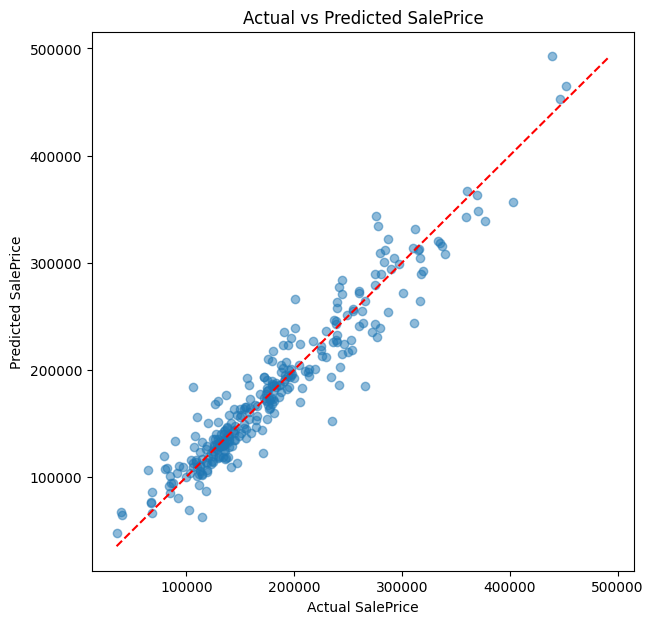

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# If you used log1p:
y_true = np.expm1(y_test)
y_pred = np.expm1(y_pred)

plt.figure(figsize=(7,7))
plt.scatter(y_true, y_pred, alpha=0.5)

# perfect prediction line
line_min = min(y_true.min(), y_pred.min())
line_max = max(y_true.max(), y_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], 'r--')

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")

plt.show()